In [1]:
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')
import cv2
from PIL import Image
import numpy as np
import pandas as pd
from PIL import Image
import sys
import random
import tqdm

In [3]:
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
import seaborn as sns

In [4]:
input_shape = (224,224,3)
epsilon = 0.001

model = Sequential()

# Initial batch normalization layer
model.add(BatchNormalization(input_shape=input_shape, epsilon=epsilon))

# First Conv Block
model.add(Conv2D(filters=16, kernel_size=3, padding='same'))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

# Second Conv Block
model.add(Conv2D(filters=32, kernel_size=3, padding='same'))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

# Third Conv Block
model.add(Conv2D(filters=64, kernel_size=3, padding='same'))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

# Fourth Conv Block
model.add(Conv2D(filters=128, kernel_size=3, padding='same'))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

# Fifth Conv Block
model.add(Conv2D(filters=256, kernel_size=3, padding='same'))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

# Sixth Conv Block
model.add(Conv2D(filters=512, kernel_size=3, padding='same'))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

# Seventh Conv Block
model.add(Conv2D(filters=1024, kernel_size=3, padding='same'))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 224, 224, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │             

 Total params: 6,301,549 (24.04 MB)

 Trainable params: 6,297,479 (24.02 MB)

 Non-trainable params: 4,070 (15.90 KB)

In [5]:
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [6]:
%pip install kagglehub
import kagglehub

# Download the latest version of the dataset
path = kagglehub.dataset_download("xhlulu/140k-real-and-fake-faces")

print("Path to dataset files:", path)

# Update the paths in your ImageDataGenerator
image_gen = ImageDataGenerator(rescale=1./255.)
batch_size = 64

train_flow = image_gen.flow_from_directory(
    f'{path}/real_vs_fake/real-vs-fake/train', target_size=(224, 224), batch_size=batch_size, class_mode='binary'
)
valid_flow = image_gen.flow_from_directory(
    f'{path}/real_vs_fake/real-vs-fake/valid', target_size=(224, 224), batch_size=batch_size, class_mode='binary'
)
test_flow = image_gen.flow_from_directory(
    f'{path}/real_vs_fake/real-vs-fake/test', target_size=(224, 224), batch_size=1, shuffle=False, class_mode='binary'
)


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Path to dataset files: C:\Users\Rishi\.cache\kagglehub\datasets\xhlulu\140k-real-and-fake-faces\versions\2
Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [7]:
import tensorflow as tf
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [8]:
from keras.optimizers import Adam
model.compile(loss='binary_crossentropy',optimizer= opt, metrics=['accuracy'])

In [9]:
checkpoint_filepath = '/kaggle/working/checkpoint.model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbacks_list = [model_checkpoint_callback]

In [10]:
# Force TensorFlow to use GPU
with tf.device('/GPU:0'):
    train_steps = 80000 // 64  # 1250
    valid_steps = 5000 // 64   # 78

    history = model.fit(
        train_flow,
        epochs=4,
        callbacks=callbacks_list,
        steps_per_epoch=train_steps,
        validation_data=valid_flow,
        validation_steps=valid_steps
    )

Epoch 1/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1686s 1s/step - accuracy: 0.5624 - loss: 0.8791 - val_accuracy: 0.7338 - val_loss: 0.5303
Epoch 2/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 334s 266ms/step - accuracy: 0.7567 - loss: 0.5002 - val_accuracy: 0.7682 - val_loss: 0.5080
Epoch 3/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1246s 996ms/step - accuracy: 0.8068 - loss: 0.4216 - val_accuracy: 0.8730 - val_loss: 0.2915
Epoch 4/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 308s 246ms/step - accuracy: 0.8824 - loss: 0.2777 - val_accuracy: 0.8802 - val_loss: 0.2895


In [11]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_flow,
        epochs =2,
        callbacks= callbacks_list,
        steps_per_epoch = train_steps,
        validation_data = valid_flow,
        validation_steps = valid_steps
)

Epoch 1/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1661s 1s/step - accuracy: 0.9003 - loss: 0.2390 - val_accuracy: 0.9441 - val_loss: 0.1468
Epoch 2/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 324s 259ms/step - accuracy: 0.9354 - loss: 0.1638 - val_accuracy: 0.8504 - val_loss: 0.3648


In [12]:
model.save("final-model-1.h5")

In [13]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

20000/20000 ━━━━━━━━━━━━━━━━━━━━ 218s 11ms/step


Accuracy Score : 0.8427
Report : 
              precision    recall  f1-score   support

           0       0.99      0.69      0.81     10000
           1       0.76      1.00      0.86     10000

    accuracy                           0.84     20000
   macro avg       0.88      0.84      0.84     20000
weighted avg       0.88      0.84      0.84     20000



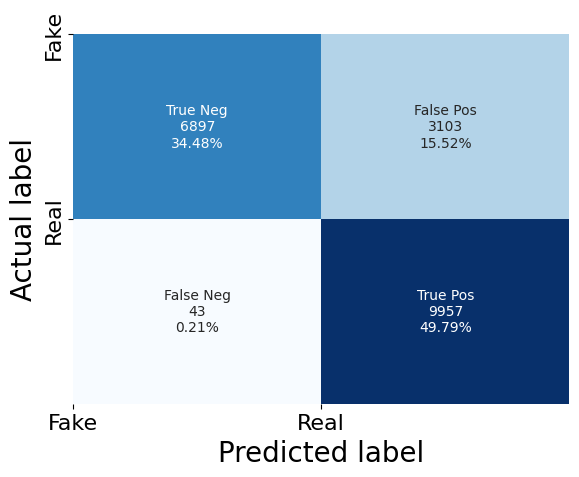

In [18]:
results = confusion_matrix(y_test, y_pred > 0.5) 
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in results.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap = 'Blues', cbar = False)
plt.ylabel('Actual label', size = 20)
plt.xlabel('Predicted label', size = 20)
plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
print('Accuracy Score :',accuracy_score(y_test, y_pred > 0.5))
print('Report : ')
print(classification_report(y_test, y_pred > 0.5))

In [15]:
print("ROC-AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))

ROC-AUC Score: 0.9821642450000001
AP Score: 0.9806770881984554


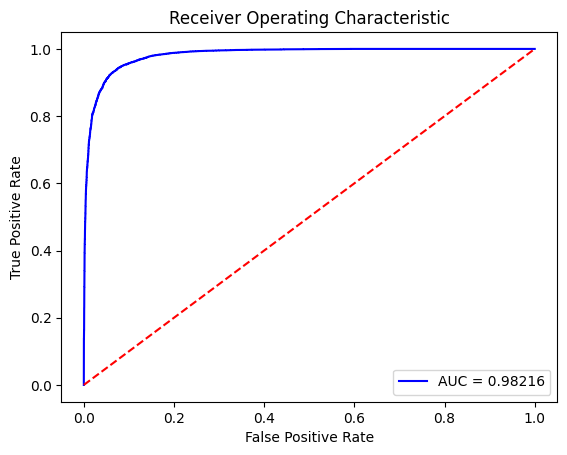

In [19]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Text(0.5, 1.0, 'Predicted by the model as FAKE, actually is FAKE')

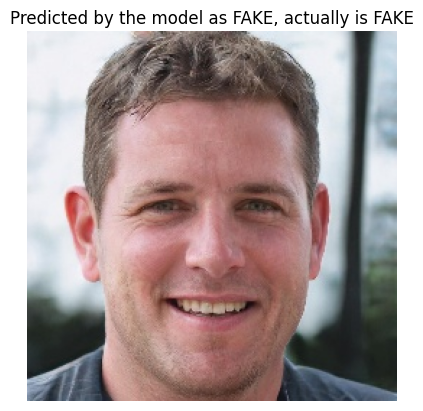

In [23]:
i = np.random.randint(20000)
datapath = 'C:/Users/Rishi/.cache/kagglehub/datasets/xhlulu/140k-real-and-fake-faces/versions/2/real_vs_fake/real-vs-fake/'
datasetpath = test_flow.filenames[i]
imgpath = datapath+'test/'+datasetpath
plt.imshow(mpimg.imread(imgpath))
plt.axis('off')

if test_flow.classes[i] == 0:
    actual = "FAKE"
else:
    actual = "REAL"  
if model.predict(test_flow[i][0])[0][0]<0.5:
    prediction = "FAKE"
else:
    prediction = "REAL"

plt.title(f"Predicted by the model as {prediction}, actually is {actual}")

In [24]:
def predict_img_class():
    k = np.random.randint(20000)
    gridx = 4
    gridy = 4
    fig, ax = plt.subplots(gridx,gridy, figsize=(14,14))
    for j in range(gridx):
        for i in range(gridy):
            if test_flow.classes[k] == 0:
                actual = "FAKE"
            else:
                actual = "REAL"  
            if model.predict(test_flow[k][0])[0][0]<0.5:
                prediction = "FAKE"
            else:
                prediction = "REAL"
            datasetpath = test_flow.filenames[k]
            imgpath = datapath+'test/'+datasetpath
            img = load_img(imgpath)          
            ax[j,i].imshow(img)
            ax[j,i].set_title(f"Predicted: {prediction}, Actual: {actual}",size = 12)
            ax[j,i].axis('off')
            k = np.random.randint(20000)
    fig.suptitle('Testing the prediction on Test images', size = 20)
    return plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


<module 'matplotlib.pyplot' from 'c:\\Users\\Rishi\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

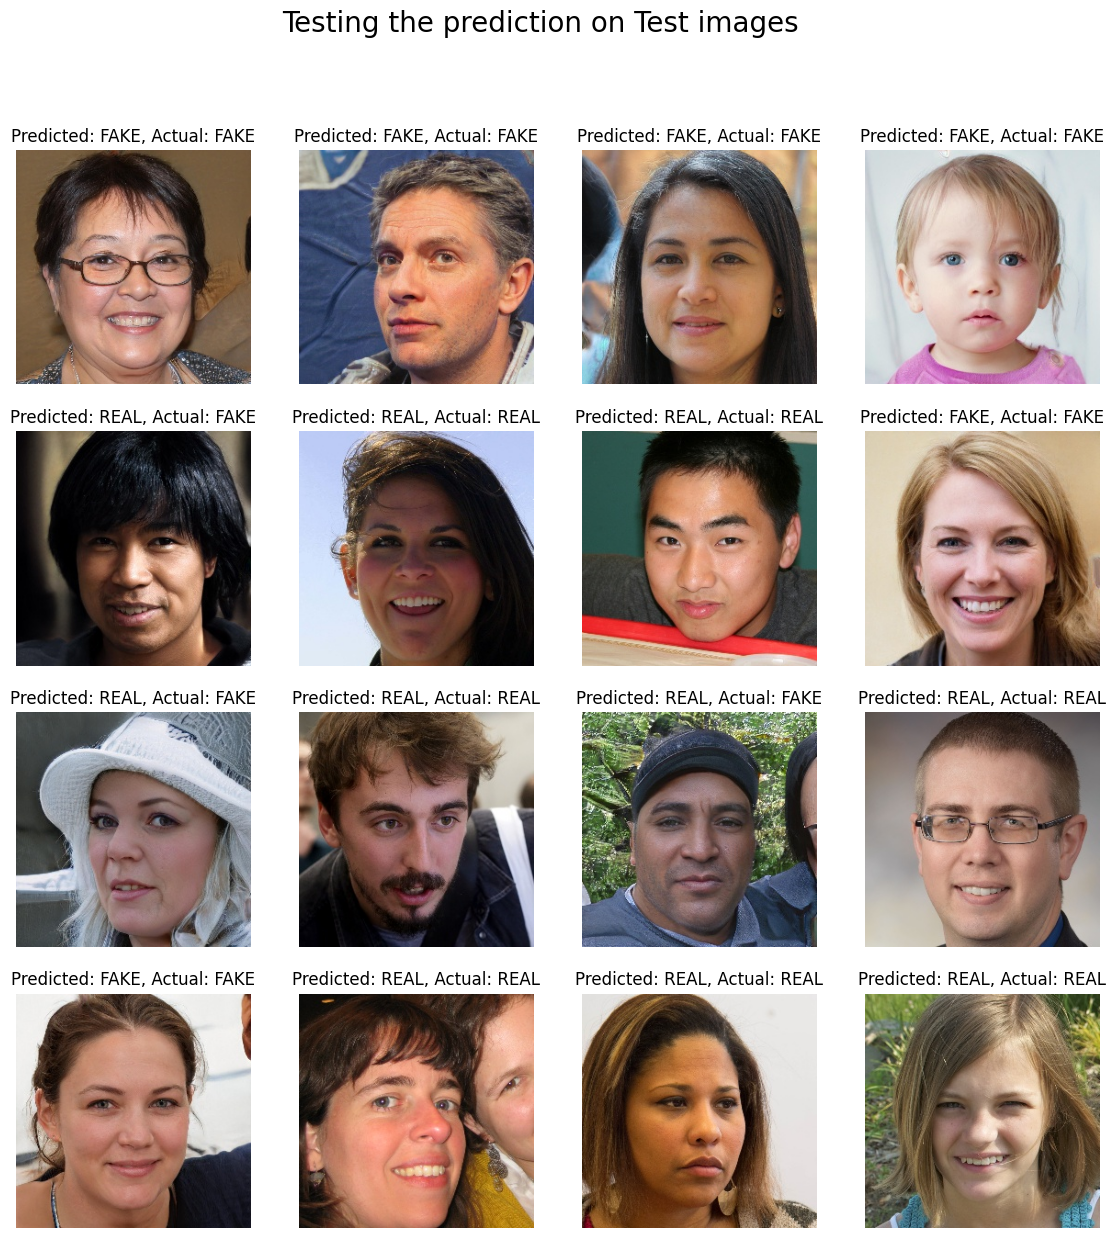

In [25]:
predict_img_class()